# Logistic Regression Comprehensive Demo

This notebook demonstrates:
- Basic logistic regression implementation
- Threshold tuning for classification
- Classification metrics evaluation
- Cost curves visualization
- Handling imbalanced datasets

**Target Audience:** Beginners in Machine Learning

**Dataset:** Titanic Survival Prediction (predicting if a passenger survived based on their characteristics)


## 1. Import Required Libraries

We'll use scikit-learn for machine learning, pandas for data manipulation, numpy for numerical operations, and matplotlib/seaborn for visualization.


In [281]:
# Import essential libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [282]:
# Import metrics and visualization tools
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, roc_curve, auc,
                             precision_recall_curve, classification_report,
                             roc_auc_score)
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
sns.set_palette("husl")


## 2. Load and Explore the Dataset

We'll use the famous Titanic dataset to predict passenger survival. This is a classic binary classification problem.


In [283]:
# Load Titanic dataset from seaborn (built-in dataset)
df = sns.load_dataset('titanic')

# Display first few rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [284]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)


Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Data types:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [285]:
# Select features for modeling
# We'll use: age, fare, sex, class, and number of siblings/spouses
features = ['age', 'fare', 'sex', 'class', 'sibsp']

# Create feature matrix X
X = df[features].copy()


In [286]:
# Create target variable (survived: 0 = No, 1 = Yes)
y = df['survived'].copy()

# Display class distribution
print("Class distribution:")
print(y.value_counts())
print(f"\nSurvival rate: {y.mean():.2%}")


Class distribution:
survived
0    549
1    342
Name: count, dtype: int64

Survival rate: 38.38%


In [287]:
# Handle missing values: fill age with median
X['age'].fillna(X['age'].median(), inplace=True)

# Handle missing values: fill fare with median
X['fare'].fillna(X['fare'].median(), inplace=True)


## 3. Preprocess Data

We need to convert categorical variables to numerical format for logistic regression.


In [288]:
# Convert categorical variables to numerical
# Sex: male=0, female=1
X['sex'] = X['sex'].map({'male': 0, 'female': 1})


In [289]:
# Convert class to numerical (First=1, Second=2, Third=3)
X['class'] = X['class'].map({'First': 1, 'Second': 2, 'Third': 3})

# Display processed features
print("Processed features:")
X.head()


Processed features:


,age,fare,sex,class,sibsp
0,22.0,7.2500,0,3,1
1,38.0,71.2833,1,1,1
2,26.0,7.9250,1,3,0
3,35.0,53.1000,1,1,1
4,35.0,8.0500,0,3,0


## 4. Split Data into Training and Testing Sets

We split the data to evaluate model performance on unseen data. Using stratify ensures both sets have similar class distributions.

In [290]:
# Split data: 80% training, 20% testing
# stratify=y ensures similar class distribution in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [291]:
# Check split sizes and class distribution
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTraining survival rate: {y_train.mean():.2%}")
print(f"Test survival rate: {y_test.mean():.2%}")


Training set: 712 samples
Test set: 179 samples

Training survival rate: 38.34%
Test survival rate: 38.55%


## 5. Train Logistic Regression Model

Logistic regression predicts probabilities. We'll use default threshold (0.5) initially, then tune it later.


### 5.1 Create and Train the Model

In [292]:
# Create logistic regression model
# max_iter ensures convergence, random_state for reproducibility
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on training data
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### 5.2 Make Predictions

Logistic regression outputs probabilities. We convert them to binary predictions using a threshold.


In [293]:
# Get predicted probabilities (probability of survival)
# [:, 1] selects probability of class 1 (survived)
y_proba = model.predict_proba(X_test)[:, 1]

# Get binary predictions using default threshold (0.5)
y_pred = model.predict(X_test)


In [294]:
# Display some example predictions
print("Sample predictions (first 10):")
print(f"Probabilities: {y_proba[:10]}")
print(f"Binary predictions: {y_pred[:10]}")
print(f"Actual labels: {y_test.values[:10]}")


Sample predictions (first 10):
Probabilities: [0.07216288 0.05965729 0.12585755 0.03791878 0.53463649 0.45936672
 0.76586105 0.34688516 0.30001079 0.17187761]
Binary predictions: [0 0 0 0 1 0 1 0 0 0]
Actual labels: [0 0 1 0 1 1 1 0 0 0]


## 6. Classification Metrics

Metrics help us understand model performance. Different metrics are important for different scenarios.


### 6.1 Confusion Matrix

The confusion matrix shows true positives, true negatives, false positives, and false negatives.


In [295]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
print("Confusion Matrix:")
print(cm)
print("\nFormat: [TN, FP]")
print("        [FN, TP]")


Confusion Matrix:
[[95 15]
 [20 49]]

Format: [TN, FP]
        [FN, TP]


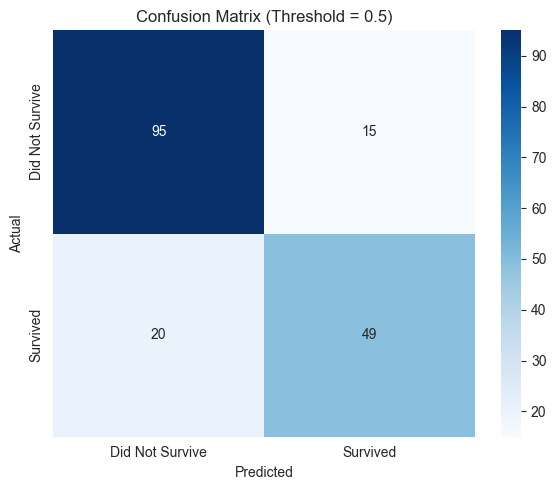

In [296]:
# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Did Not Survive', 'Survived'], 
            yticklabels=['Did Not Survive', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Threshold = 0.5)')
plt.tight_layout()
plt.show()


### 6.2 Basic Classification Metrics

- **Accuracy**: Overall correctness (can be misleading with imbalanced data)
- **Precision**: Of predicted positives, how many are actually positive?
- **Recall**: Of actual positives, how many did we catch?
- **F1-Score**: Harmonic mean of precision and recall


In [297]:
# Calculate key metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")


Accuracy:  0.8045
Precision: 0.7656
Recall:    0.7101
F1-Score:  0.7368


In [298]:
# Detailed classification report
print(classification_report(y_test, y_pred, 
                          target_names=['Did Not Survive', 'Survived']))


                 precision    recall  f1-score   support

Did Not Survive       0.83      0.86      0.84       110
       Survived       0.77      0.71      0.74        69

       accuracy                           0.80       179
      macro avg       0.80      0.79      0.79       179
   weighted avg       0.80      0.80      0.80       179



## 7. Threshold Tuning

The default threshold is 0.5, but this may not be optimal. Different thresholds balance precision and recall differently.

**Edge Case**: When classes are imbalanced, default threshold often favors the majority class.


### 7.1 Understanding Threshold Impact

Lower threshold → More positive predictions → Higher recall, Lower precision
Higher threshold → Fewer positive predictions → Lower recall, Higher precision


In [299]:
# Test different thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

# Store results for each threshold
results = []

for threshold in thresholds:
    # Convert probabilities to binary predictions
    y_pred_thresh = (y_proba >= threshold).astype(int)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred_thresh)
    prec = precision_score(y_test, y_pred_thresh)
    rec = recall_score(y_test, y_pred_thresh)
    f1_val = f1_score(y_test, y_pred_thresh)
    
    results.append({
        'threshold': threshold,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1_val
    })


In [300]:
# Display results as DataFrame
results_df = pd.DataFrame(results)
print("Metrics at Different Thresholds:")
print(results_df.round(4))


Metrics at Different Thresholds:
   threshold  accuracy  precision  recall      f1
0        0.3    0.7709     0.6707  0.7971  0.7285
1        0.4    0.8101     0.7397  0.7826  0.7606
2        0.5    0.8045     0.7656  0.7101  0.7368
3        0.6    0.8045     0.8542  0.5942  0.7009
4        0.7    0.7765     0.9394  0.4493  0.6078


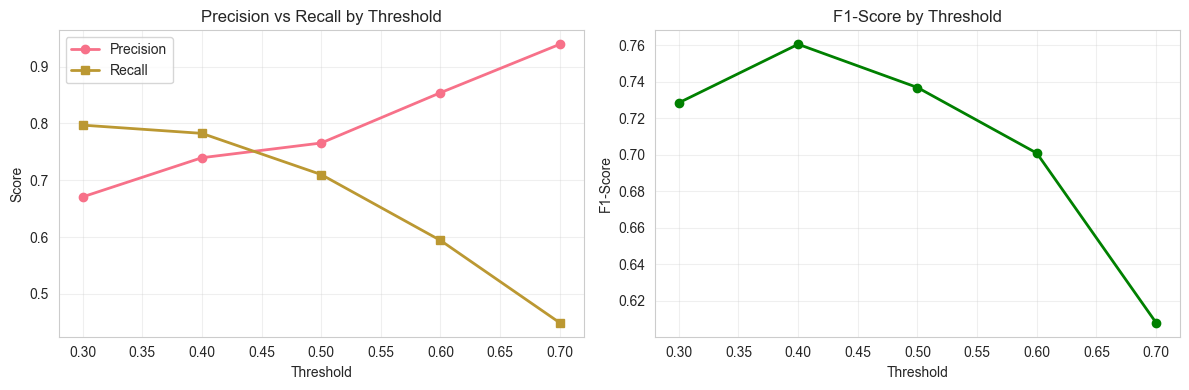

In [301]:
# Visualize threshold impact
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Precision and Recall
axes[0].plot(results_df['threshold'], results_df['precision'], 
             'o-', label='Precision', linewidth=2)
axes[0].plot(results_df['threshold'], results_df['recall'], 
             's-', label='Recall', linewidth=2)
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('Score')
axes[0].set_title('Precision vs Recall by Threshold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: F1-Score
axes[1].plot(results_df['threshold'], results_df['f1'], 
             'o-', color='green', linewidth=2)
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('F1-Score')
axes[1].set_title('F1-Score by Threshold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 7.2 Finding Optimal Threshold

We can use F1-score or Youden's J statistic to find the optimal threshold.


In [302]:
# Find threshold that maximizes F1-score
# Test many thresholds between 0 and 1
test_thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = []

for thresh in test_thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))


In [303]:
# Find optimal threshold (maximizes F1-score)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = test_thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Optimal F1-score: {optimal_f1:.4f}")


Optimal threshold: 0.420
Optimal F1-score: 0.7660


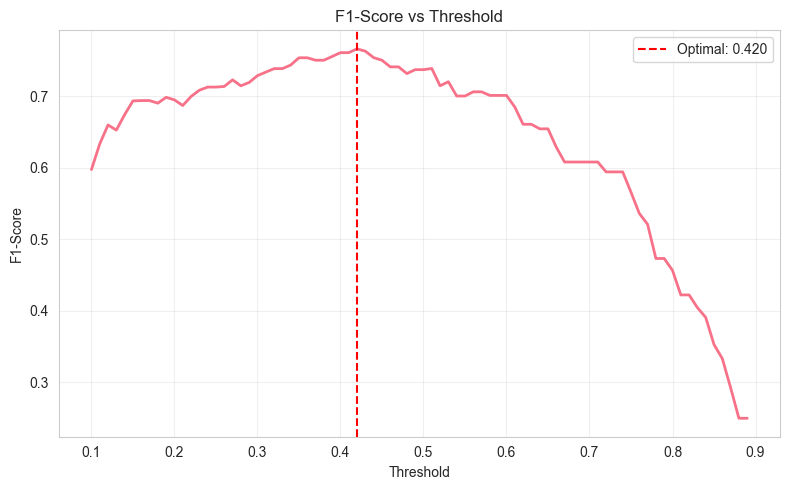

In [304]:
# Visualize F1-score across all thresholds
plt.figure(figsize=(8, 5))
plt.plot(test_thresholds, f1_scores, linewidth=2)
plt.axvline(optimal_threshold, color='red', linestyle='--', 
            label=f'Optimal: {optimal_threshold:.3f}')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [305]:
# Compare default vs optimal threshold
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

print("Default Threshold (0.5):")
print(f"  Precision: {precision_score(y_test, y_pred):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred):.4f}")

print("\nOptimal Threshold:")
print(f"  Precision: {precision_score(y_test, y_pred_optimal):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_optimal):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_optimal):.4f}")


Default Threshold (0.5):
  Precision: 0.7656
  Recall:    0.7101
  F1-Score:  0.7368

Optimal Threshold:
  Precision: 0.7500
  Recall:    0.7826
  F1-Score:  0.7660


## 8. ROC Curve and AUC

ROC (Receiver Operating Characteristic) curve shows the trade-off between True Positive Rate (Recall) and False Positive Rate at different thresholds.

**AUC (Area Under Curve)**: Measures overall model performance. Higher is better (max = 1.0).


In [306]:
# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)

# Calculate AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

print(f"AUC-ROC Score: {roc_auc:.4f}")
print(f"Interpretation: {'Excellent' if roc_auc > 0.9 else 'Good' if roc_auc > 0.8 else 'Fair' if roc_auc > 0.7 else 'Poor'}")


AUC-ROC Score: 0.8527
Interpretation: Good


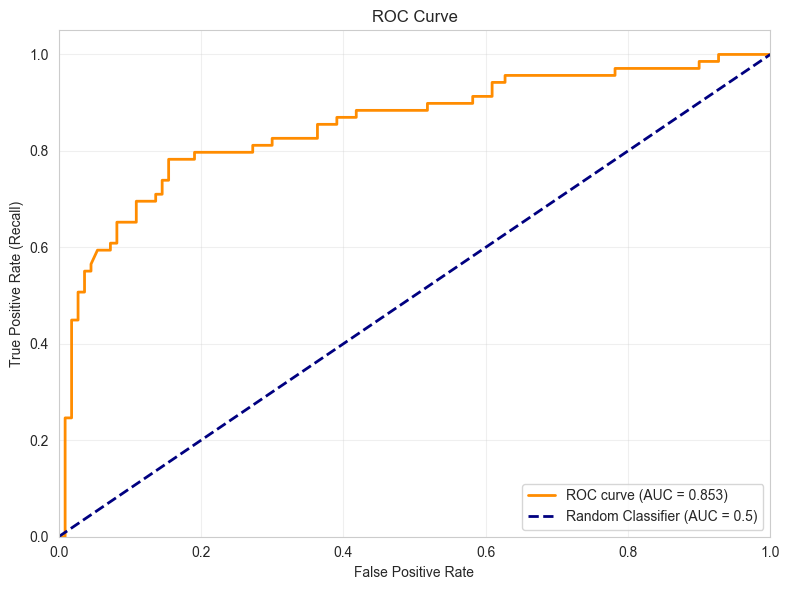

In [307]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, 
         linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 9. Precision-Recall Curve

Precision-Recall curve is especially useful for imbalanced datasets. It shows the trade-off between precision and recall.

**Edge Case**: When classes are highly imbalanced, PR curve is more informative than ROC curve.


In [308]:
# Calculate Precision-Recall curve
precision_vals, recall_vals, thresholds_pr = precision_recall_curve(y_test, y_proba)

# Calculate AUC for PR curve
pr_auc = auc(recall_vals, precision_vals)

print(f"AUC-PR Score: {pr_auc:.4f}")


AUC-PR Score: 0.7862


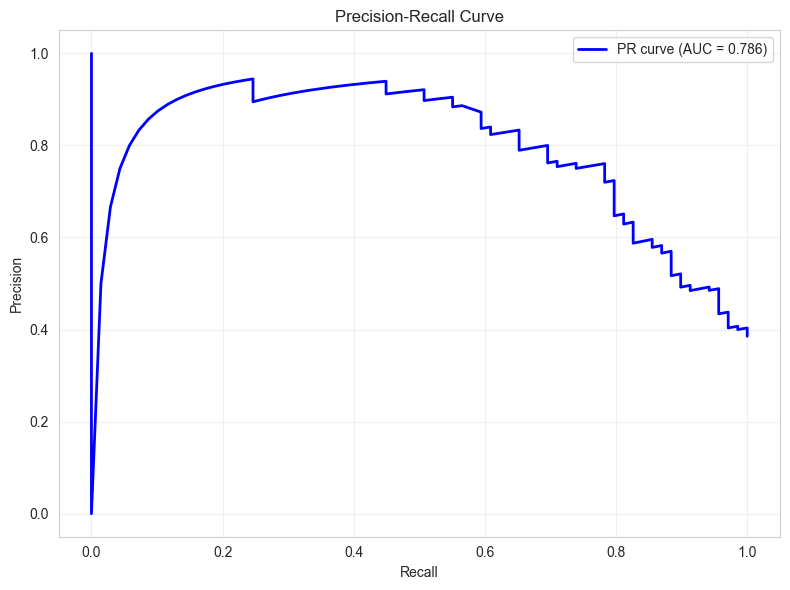

In [309]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='blue', lw=2,
         label=f'PR curve (AUC = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 10. Cost Curves

Cost curves help visualize the cost of misclassification at different thresholds. Useful when false positives and false negatives have different costs.

**Edge Case**: In medical diagnosis, false negatives (missing a disease) may be much costlier than false positives.


In [310]:
# Define cost of false positives and false negatives
# Example: Missing a survivor (FN) costs 2, false alarm (FP) costs 1
cost_fp = 1  # Cost of false positive
cost_fn = 2  # Cost of false negative

# Calculate costs at different thresholds
thresholds_cost = np.arange(0.1, 0.9, 0.01)
total_costs = []

for thresh in thresholds_cost:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    cm_thresh = confusion_matrix(y_test, y_pred_thresh)
    
    # Extract components (assuming binary classification)
    tn, fp, fn, tp = cm_thresh.ravel()
    
    # Calculate total cost
    total_cost = (fp * cost_fp) + (fn * cost_fn)
    total_costs.append(total_cost)


In [311]:
# Find threshold with minimum cost
optimal_cost_idx = np.argmin(total_costs)
optimal_cost_threshold = thresholds_cost[optimal_cost_idx]
min_cost = total_costs[optimal_cost_idx]

print(f"Optimal threshold (min cost): {optimal_cost_threshold:.3f}")
print(f"Minimum total cost: {min_cost}")


Optimal threshold (min cost): 0.420
Minimum total cost: 48


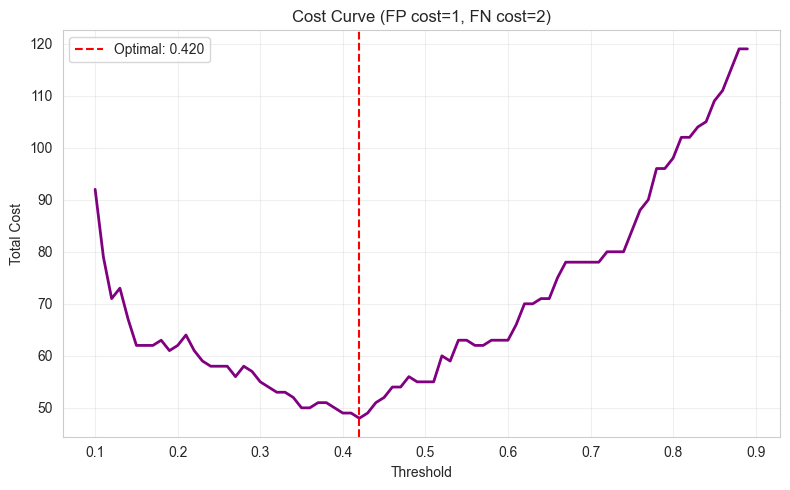

In [312]:
# Plot cost curve
plt.figure(figsize=(8, 5))
plt.plot(thresholds_cost, total_costs, linewidth=2, color='purple')
plt.axvline(optimal_cost_threshold, color='red', linestyle='--',
            label=f'Optimal: {optimal_cost_threshold:.3f}')
plt.xlabel('Threshold')
plt.ylabel('Total Cost')
plt.title(f'Cost Curve (FP cost={cost_fp}, FN cost={cost_fn})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 10.1 Comparing Different Cost Scenarios

Let's see how different cost ratios affect the optimal threshold.


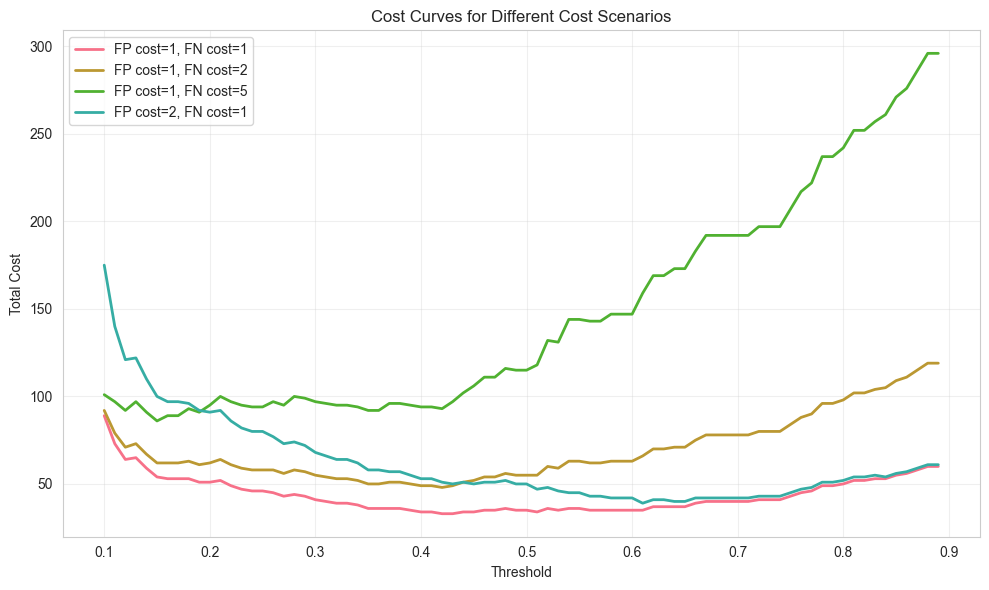

In [313]:
# Test different cost scenarios
cost_scenarios = [
    (1, 1),   # Equal costs
    (1, 2),   # FN costs 2x more
    (1, 5),   # FN costs 5x more
    (2, 1)    # FP costs 2x more
]

fig, ax = plt.subplots(figsize=(10, 6))

for cost_fp, cost_fn in cost_scenarios:
    costs = []
    for thresh in thresholds_cost:
        y_pred_thresh = (y_proba >= thresh).astype(int)
        cm_thresh = confusion_matrix(y_test, y_pred_thresh)
        tn, fp, fn, tp = cm_thresh.ravel()
        costs.append((fp * cost_fp) + (fn * cost_fn))
    
    ax.plot(thresholds_cost, costs, linewidth=2,
            label=f'FP cost={cost_fp}, FN cost={cost_fn}')

ax.set_xlabel('Threshold')
ax.set_ylabel('Total Cost')
ax.set_title('Cost Curves for Different Cost Scenarios')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 11. Handling Imbalanced Data - Fraud Detection Example

In BFSI (Banking, Financial Services, and Insurance), fraud detection is a classic imbalanced problem. Typically, only 1-2% of transactions are fraudulent (90:10 or even 99:1 ratio).

**Critical Edge Case**: With 90% legitimate transactions and 10% fraud, a naive model predicting "always legitimate" gets 90% accuracy but catches ZERO fraud cases - a disaster for banks!

**Business Impact**: Missing fraud (False Negatives) costs millions, while false alarms (False Positives) just annoy customers.


### 11.1 Load Fraud Detection Dataset (Interpretable Features)

We'll use a **Fraud Detection** dataset with **interpretable features** that students can understand:
- `income`: Customer income
- `customer_age`: Customer age
- `credit_risk_score`: Credit risk assessment
- `employment_status`: Employment status (categorical)
- `housing_status`: Housing status (categorical)
- `payment_type`: Payment method (categorical)
- `proposed_credit_limit`: Proposed credit limit
- `prev_address_months_count`: Months at previous address
- `current_address_months_count`: Months at current address
- And many more interpretable features!

**Target**: `fraud_bool` (0=legitimate, 1=fraud)

This is perfect for teaching - all features have clear meanings!


In [314]:
# Load Fraud Detection dataset
df_fraud = pd.read_csv('/Users/varunraste/Downloads/base.csv')

print(f"Dataset loaded! Shape: {df_fraud.shape}")
print(f"\nDataset Info:")
print(df_fraud.info())

# Display interpretable features
interpretable_features = ['income', 'customer_age', 'credit_risk_score', 
                         'employment_status', 'housing_status', 'payment_type',
                         'proposed_credit_limit', 'fraud_bool']
available_features = [f for f in interpretable_features if f in df_fraud.columns]
print(f"\n✓ Found {len(available_features)} interpretable features:")
for feat in available_features:
    print(f"  - {feat}")

print(f"\nTarget: 'fraud_bool' (0=legitimate, 1=fraud)")
df_fraud.head()

Dataset loaded! Shape: (1000000, 32)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null 

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [315]:
# Check for missing values
print("Missing values per column:")
missing = df_fraud.isna().sum()
print(missing[missing > 0] if missing.sum() > 0 else "✓ No missing values!")

# Check original class distribution
target_col = 'fraud_bool'
class_dist_original = df_fraud[target_col].value_counts()
print(f"\nOriginal Dataset - Class Distribution:")
print(class_dist_original)
print(f"\nOriginal Imbalance Ratio: {class_dist_original.iloc[0] / class_dist_original.iloc[1]:.1f}:1")
print(f"Fraud Rate: {class_dist_original.iloc[1] / len(df_fraud):.2%}")

Missing values per column:
✓ No missing values!

Original Dataset - Class Distribution:
fraud_bool
0    988971
1     11029
Name: count, dtype: int64

Original Imbalance Ratio: 89.7:1
Fraud Rate: 1.10%


In [316]:
# Prepare features and target
# Select all features except target
feature_cols = [col for col in df_fraud.columns if col != target_col]
print(f"Selected {len(feature_cols)} features (excluding target)")

# Handle categorical features (encode them)
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df_fraud[feature_cols].select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical features to encode: {categorical_cols}")

# Create a copy for processing
df_fraud_processed = df_fraud.copy()

# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_fraud_processed[col] = le.fit_transform(df_fraud_processed[col].astype(str))
    label_encoders[col] = le
    print(f"  Encoded '{col}': {len(le.classes_)} unique values")

# Prepare X and y
X_fraud = df_fraud_processed[feature_cols].copy()
y_fraud = df_fraud_processed[target_col].copy()

print(f"\n✓ Data prepared: X shape {X_fraud.shape}, y shape {y_fraud.shape}")

Selected 31 features (excluding target)

Categorical features to encode: ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
  Encoded 'payment_type': 5 unique values
  Encoded 'employment_status': 7 unique values
  Encoded 'housing_status': 7 unique values
  Encoded 'source': 2 unique values
  Encoded 'device_os': 5 unique values

✓ Data prepared: X shape (1000000, 31), y shape (1000000,)


In [317]:
# Sample to create 90:10 ratio for demonstration
np.random.seed(42)

# Get all fraud cases (minority class)
fraud_cases = df_fraud_processed[df_fraud_processed[target_col] == 1]
n_fraud = len(fraud_cases)
print(f"Total fraud cases: {n_fraud:,}")

# Sample legitimate cases to create 90:10 ratio
legitimate_cases = df_fraud_processed[df_fraud_processed[target_col] == 0]
n_legitimate_needed = n_fraud * 9  # 9x more for 90:10 ratio
n_legitimate_available = len(legitimate_cases)

if n_legitimate_needed <= n_legitimate_available:
    legitimate_sample = legitimate_cases.sample(n=n_legitimate_needed, random_state=42)
    print(f"Sampled {n_legitimate_needed:,} legitimate cases (90:10 ratio)")
else:
    # If we don't have enough, use all available
    legitimate_sample = legitimate_cases
    print(f"Using all {n_legitimate_available:,} available legitimate cases")
    print(f"Actual ratio will be: {len(legitimate_sample) / n_fraud:.1f}:1")

# Combine and shuffle
df_fraud_sample = pd.concat([legitimate_sample, fraud_cases]).sample(
    frac=1, random_state=42
).reset_index(drop=True)

# Update X and y with sampled data
X_fraud = df_fraud_sample[feature_cols].copy()
y_fraud = df_fraud_sample[target_col].copy()

# Show new distribution
print("\nSampled Dataset - Class Distribution:")
print(y_fraud.value_counts())
print(f"\nNew Imbalance Ratio: {y_fraud.value_counts()[0] / y_fraud.value_counts()[1]:.1f}:1")
print(f"Fraud Rate: {y_fraud.value_counts()[1] / len(y_fraud):.2%}")
print(f"\n✓ Ready for modeling! Total samples: {len(X_fraud):,}")

Total fraud cases: 11,029
Sampled 99,261 legitimate cases (90:10 ratio)

Sampled Dataset - Class Distribution:
fraud_bool
0    99261
1    11029
Name: count, dtype: int64

New Imbalance Ratio: 9.0:1
Fraud Rate: 10.00%

✓ Ready for modeling! Total samples: 110,290


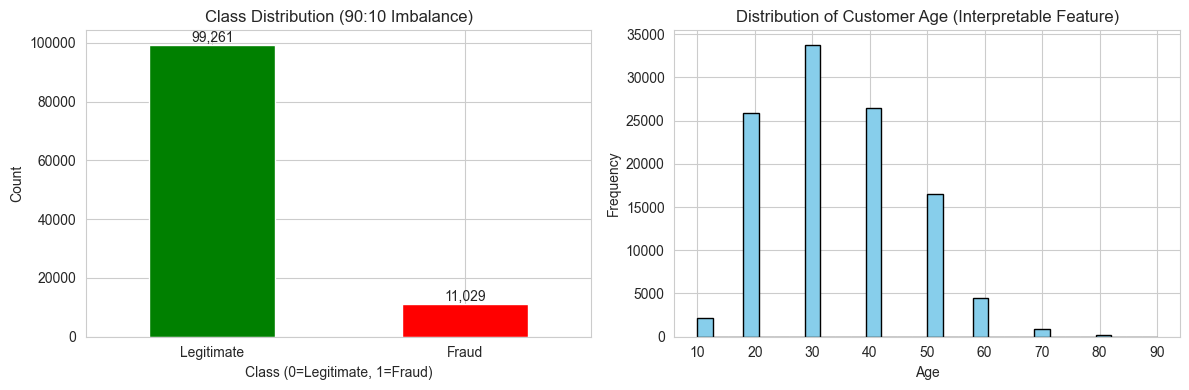


✓ Dataset ready with interpretable features!
   Features like income, customer_age, credit_risk_score are easy to understand!
   Total samples: 110,290
   Total features: 31


In [318]:
# Visualize class distribution and sample interpretable features
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Class distribution
y_fraud.value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Class Distribution (90:10 Imbalance)')
axes[0].set_xlabel('Class (0=Legitimate, 1=Fraud)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Legitimate', 'Fraud'], rotation=0)
for i, v in enumerate(y_fraud.value_counts()):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom')

# Sample interpretable feature (customer_age or income distribution)
if 'customer_age' in X_fraud.columns:
    X_fraud['customer_age'].hist(bins=30, ax=axes[1], color='skyblue', edgecolor='black')
    axes[1].set_title('Distribution of Customer Age (Interpretable Feature)')
    axes[1].set_xlabel('Age')
    axes[1].set_ylabel('Frequency')
elif 'income' in X_fraud.columns:
    X_fraud['income'].hist(bins=50, ax=axes[1], color='skyblue', edgecolor='black')
    axes[1].set_title('Distribution of Income (Interpretable Feature)')
    axes[1].set_xlabel('Income')
    axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n✓ Dataset ready with interpretable features!")
print(f"   Features like income, customer_age, credit_risk_score are easy to understand!")
print(f"   Total samples: {len(X_fraud):,}")
print(f"   Total features: {len(X_fraud.columns)}")


### 11.2 Train Model on Imbalanced Data (Baseline)

First, let's see what happens with a standard model on this 90:10 imbalanced data. This demonstrates why handling imbalance is critical!

**What to expect**: The model will likely favor the majority class (legitimate transactions) and miss most fraud cases.


In [319]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split with stratification to maintain class distribution
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(
    X_fraud, y_fraud, test_size=0.2, random_state=42, stratify=y_fraud
)

print(f"Training set: {X_fraud_train.shape[0]:,} samples")
print(f"Test set: {X_fraud_test.shape[0]:,} samples")
print(f"\nTraining class distribution:")
print(y_fraud_train.value_counts())
print(f"\nTest class distribution:")
print(y_fraud_test.value_counts())

# Scale features (important for logistic regression)
scaler = StandardScaler()
X_fraud_train_scaled = scaler.fit_transform(X_fraud_train)
X_fraud_test_scaled = scaler.transform(X_fraud_test)

print(f"\n✓ Data split and scaled! Features: {X_fraud_train.shape[1]}")


Training set: 88,232 samples
Test set: 22,058 samples

Training class distribution:
fraud_bool
0    79409
1     8823
Name: count, dtype: int64

Test class distribution:
fraud_bool
0    19852
1     2206
Name: count, dtype: int64

✓ Data split and scaled! Features: 31


In [320]:
# Train standard model WITHOUT class weights (baseline)
model_fraud_standard = LogisticRegression(random_state=42, max_iter=1000)
model_fraud_standard.fit(X_fraud_train_scaled, y_fraud_train)

# Get predictions
y_fraud_proba = model_fraud_standard.predict_proba(X_fraud_test_scaled)[:, 1]
y_fraud_pred = model_fraud_standard.predict(X_fraud_test_scaled)

print("Standard Model (No Class Weights) - Results:")
print(f"  Accuracy:  {accuracy_score(y_fraud_test, y_fraud_pred):.4f}")
print(f"  Precision: {precision_score(y_fraud_test, y_fraud_pred):.4f}")
print(f"  Recall:    {recall_score(y_fraud_test, y_fraud_pred):.4f}  ⚠️  This will be VERY LOW!")
print(f"  F1-Score:  {f1_score(y_fraud_test, y_fraud_pred):.4f}")

# Show confusion matrix
cm_standard = confusion_matrix(y_fraud_test, y_fraud_pred)
print(f"\nConfusion Matrix:")
print(f"  Legitimate correctly identified (TN): {cm_standard[0,0]:,}")
print(f"  False Alarms (FP): {cm_standard[0,1]:,}")
print(f"  MISSED FRAUD (FN): {cm_standard[1,0]:,}  <-- CRITICAL!")
print(f"  Fraud caught (TP): {cm_standard[1,1]:,}")


Standard Model (No Class Weights) - Results:
  Accuracy:  0.9118
  Precision: 0.6529
  Recall:    0.2516  ⚠️  This will be VERY LOW!
  F1-Score:  0.3632

Confusion Matrix:
  Legitimate correctly identified (TN): 19,557
  False Alarms (FP): 295
  MISSED FRAUD (FN): 1,651  <-- CRITICAL!
  Fraud caught (TP): 555


### 11.3 Method 1: Use Class Weights

Class weights automatically adjust the model to penalize misclassifying fraud (minority class) more heavily. 

**How it works**: With 90:10 imbalance, fraud class gets 9x more weight, making the model pay more attention to catching fraud cases.

**Advantage**: No need to modify the dataset, just change model parameters.


In [321]:
# Train model WITH balanced class weights
model_fraud_balanced = LogisticRegression(
    random_state=42, 
    max_iter=1000,
    class_weight='balanced'  # Automatically balances class weights
)
model_fraud_balanced.fit(X_fraud_train_scaled, y_fraud_train)

# Get predictions
y_fraud_proba_balanced = model_fraud_balanced.predict_proba(X_fraud_test_scaled)[:, 1]
y_fraud_pred_balanced = model_fraud_balanced.predict(X_fraud_test_scaled)

print("Balanced Class Weights Model - Results:")
print(f"  Accuracy:  {accuracy_score(y_fraud_test, y_fraud_pred_balanced):.4f}")
print(f"  Precision: {precision_score(y_fraud_test, y_fraud_pred_balanced):.4f}")
print(f"  Recall:    {recall_score(y_fraud_test, y_fraud_pred_balanced):.4f}  ✅ Much Better!")
print(f"  F1-Score:  {f1_score(y_fraud_test, y_fraud_pred_balanced):.4f}")

# Compare with standard model
print(f"\n📊 Comparison:")
print(f"  Recall improved: {recall_score(y_fraud_test, y_fraud_pred_balanced) - recall_score(y_fraud_test, y_fraud_pred):.4f}")
print(f"  💡 Key Insight: Recall (catching fraud) improved significantly!")
print(f"     In fraud detection, high recall is critical - we can't miss fraud!")


Balanced Class Weights Model - Results:
  Accuracy:  0.7902
  Precision: 0.2947
  Recall:    0.7879  ✅ Much Better!
  F1-Score:  0.4289

📊 Comparison:
  Recall improved: 0.5363
  💡 Key Insight: Recall (catching fraud) improved significantly!
     In fraud detection, high recall is critical - we can't miss fraud!


### 11.4 Method 2: Oversampling (Resampling)

We can oversample fraud cases to balance the dataset from 90:10 to 50:50. This creates more fraud examples for the model to learn from.

**How it works**: Duplicate fraud cases until we have equal numbers of legitimate and fraud transactions.

**Note**: This increases training data size, which may slow down training slightly.


In [322]:
# Oversample fraud cases to balance the dataset
from sklearn.utils import resample

# Combine X and y for resampling
df_fraud_train = pd.DataFrame(X_fraud_train_scaled, columns=X_fraud.columns)
df_fraud_train['target'] = y_fraud_train.values

# Separate classes
legitimate = df_fraud_train[df_fraud_train['target'] == 0]
fraud = df_fraud_train[df_fraud_train['target'] == 1]

print(f"Before oversampling:")
print(f"  Legitimate: {len(legitimate):,}")
print(f"  Fraud: {len(fraud):,}")

# Upsample fraud to match legitimate
fraud_upsampled = resample(fraud, 
                           replace=True,  # Sample with replacement
                           n_samples=len(legitimate),  # Match legitimate count
                           random_state=42)

# Combine
df_fraud_upsampled = pd.concat([legitimate, fraud_upsampled]).sample(
    frac=1, random_state=42
).reset_index(drop=True)

# Split back to X and y
X_fraud_upsampled = df_fraud_upsampled.drop('target', axis=1).values
y_fraud_upsampled = df_fraud_upsampled['target'].values

print(f"\nAfter oversampling:")
print(f"  Legitimate: {(y_fraud_upsampled == 0).sum():,}")
print(f"  Fraud: {(y_fraud_upsampled == 1).sum():,}")
print(f"  Ratio: 50:50 ✓")


Before oversampling:
  Legitimate: 79,409
  Fraud: 8,823

After oversampling:
  Legitimate: 79,409
  Fraud: 79,409
  Ratio: 50:50 ✓


In [323]:
# Train model on upsampled data
model_fraud_upsampled = LogisticRegression(random_state=42, max_iter=1000)
model_fraud_upsampled.fit(X_fraud_upsampled, y_fraud_upsampled)

# Get predictions on test set
y_fraud_pred_upsampled = model_fraud_upsampled.predict(X_fraud_test_scaled)

print("Upsampled Data Model - Results:")
print(f"  Accuracy:  {accuracy_score(y_fraud_test, y_fraud_pred_upsampled):.4f}")
print(f"  Precision: {precision_score(y_fraud_test, y_fraud_pred_upsampled):.4f}")
print(f"  Recall:    {recall_score(y_fraud_test, y_fraud_pred_upsampled):.4f}  ✅ Good!")
print(f"  F1-Score:  {f1_score(y_fraud_test, y_fraud_pred_upsampled):.4f}")


Upsampled Data Model - Results:
  Accuracy:  0.7899
  Precision: 0.2944
  Recall:    0.7883  ✅ Good!
  F1-Score:  0.4287


In [324]:
# Compare all three approaches
print("=" * 70)
print("FRAUD DETECTION MODEL COMPARISON (90:10 Imbalanced Data)")
print("=" * 70)

print("\n1. Standard Model (No Handling):")
print(f"   Precision: {precision_score(y_fraud_test, y_fraud_pred):.4f}")
print(f"   Recall:    {recall_score(y_fraud_test, y_fraud_pred):.4f}  ⚠️  Very Low!")
print(f"   F1-Score:  {f1_score(y_fraud_test, y_fraud_pred):.4f}")

print("\n2. Balanced Class Weights:")
print(f"   Precision: {precision_score(y_fraud_test, y_fraud_pred_balanced):.4f}")
print(f"   Recall:    {recall_score(y_fraud_test, y_fraud_pred_balanced):.4f}  ✅ Much Better!")
print(f"   F1-Score:  {f1_score(y_fraud_test, y_fraud_pred_balanced):.4f}")

print("\n3. Upsampled Data:")
print(f"   Precision: {precision_score(y_fraud_test, y_fraud_pred_upsampled):.4f}")
print(f"   Recall:    {recall_score(y_fraud_test, y_fraud_pred_upsampled):.4f}  ✅ Good!")
print(f"   F1-Score:  {f1_score(y_fraud_test, y_fraud_pred_upsampled):.4f}")

print("\n💡 Business Impact:")
print("   - High Recall = Catch more fraud (save money)")
print("   - Lower Precision = More false alarms (customer annoyance)")
print("   - In fraud detection, RECALL is often more important than precision!")


FRAUD DETECTION MODEL COMPARISON (90:10 Imbalanced Data)

1. Standard Model (No Handling):
   Precision: 0.6529
   Recall:    0.2516  ⚠️  Very Low!
   F1-Score:  0.3632

2. Balanced Class Weights:
   Precision: 0.2947
   Recall:    0.7879  ✅ Much Better!
   F1-Score:  0.4289

3. Upsampled Data:
   Precision: 0.2944
   Recall:    0.7883  ✅ Good!
   F1-Score:  0.4287

💡 Business Impact:
   - High Recall = Catch more fraud (save money)
   - Lower Precision = More false alarms (customer annoyance)
   - In fraud detection, RECALL is often more important than precision!


### 11.5 Visual Comparison: Why 90:10 Imbalance is Dangerous

Let's visualize how the standard model fails on imbalanced data and how our solutions improve fraud detection.

**Key Insight**: Notice how the standard model has very low True Positives (fraud caught) in the confusion matrix!


In [325]:
# Calculate ROC curves for all models
y_fraud_proba_upsampled = model_fraud_upsampled.predict_proba(X_fraud_test_scaled)[:, 1]

fpr_std, tpr_std, _ = roc_curve(y_fraud_test, y_fraud_proba)
fpr_bal, tpr_bal, _ = roc_curve(y_fraud_test, y_fraud_proba_balanced)
fpr_up, tpr_up, _ = roc_curve(y_fraud_test, y_fraud_proba_upsampled)

# Calculate AUCs
auc_std = roc_auc_score(y_fraud_test, y_fraud_proba)
auc_bal = roc_auc_score(y_fraud_test, y_fraud_proba_balanced)
auc_up = roc_auc_score(y_fraud_test, y_fraud_proba_upsampled)

print("AUC-ROC Scores:")
print(f"  Standard: {auc_std:.4f}")
print(f"  Balanced Weights: {auc_bal:.4f}")
print(f"  Upsampled: {auc_up:.4f}")


AUC-ROC Scores:
  Standard: 0.8657
  Balanced Weights: 0.8664
  Upsampled: 0.8664


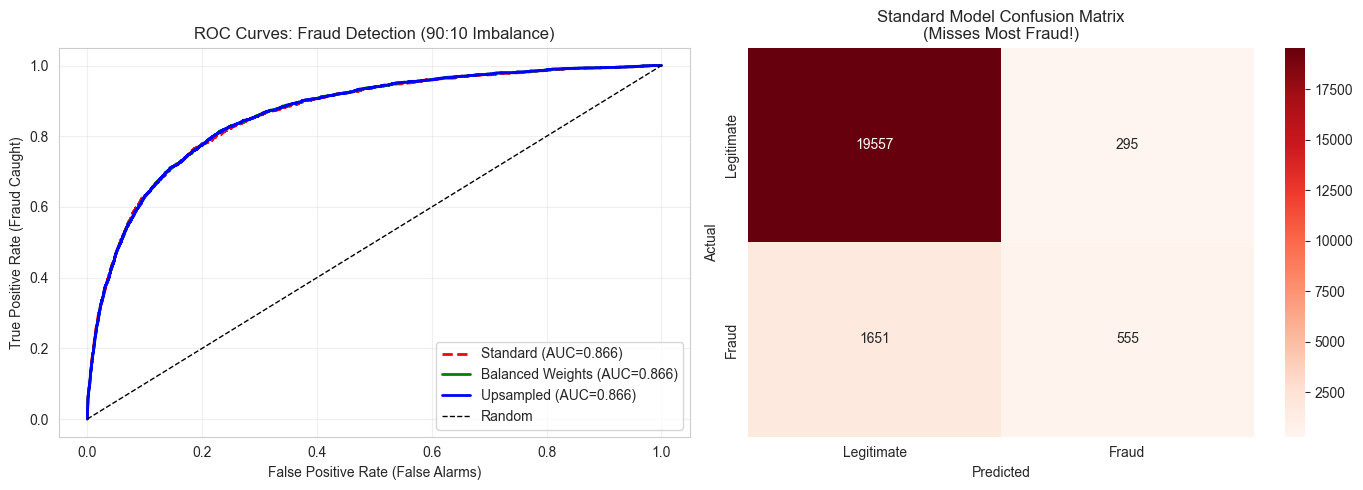


⚠️  Notice: Standard model has very low True Positives (fraud caught)
   This is why handling imbalanced data is CRITICAL in fraud detection!


In [326]:
# Visualize ROC curves and confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curves
axes[0].plot(fpr_std, tpr_std, label=f'Standard (AUC={auc_std:.3f})', 
             linewidth=2, color='red', linestyle='--')
axes[0].plot(fpr_bal, tpr_bal, label=f'Balanced Weights (AUC={auc_bal:.3f})', 
             linewidth=2, color='green')
axes[0].plot(fpr_up, tpr_up, label=f'Upsampled (AUC={auc_up:.3f})', 
             linewidth=2, color='blue')
axes[0].plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
axes[0].set_xlabel('False Positive Rate (False Alarms)')
axes[0].set_ylabel('True Positive Rate (Fraud Caught)')
axes[0].set_title('ROC Curves: Fraud Detection (90:10 Imbalance)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Confusion Matrix for Standard Model
cm_std = confusion_matrix(y_fraud_test, y_fraud_pred)
sns.heatmap(cm_std, annot=True, fmt='d', cmap='Reds', ax=axes[1], 
            xticklabels=['Legitimate', 'Fraud'], 
            yticklabels=['Legitimate', 'Fraud'])
axes[1].set_title('Standard Model Confusion Matrix\n(Misses Most Fraud!)')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

print("\n⚠️  Notice: Standard model has very low True Positives (fraud caught)")
print("   This is why handling imbalanced data is CRITICAL in fraud detection!")
